# Noise and filtering
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/YoniChechik/AI_is_Math/blob/master/p_02_image_processing/noise_and_filtering.ipynb)
## Prep



In [1]:
# to run in google colab
import sys
if 'google.colab' in sys.modules:
    ! apt-get install subversion
    ! svn export https://github.com/YoniChechik/AI_is_Math/trunk/p_02_image_processing/Tour_Eiffel.jpg



In [2]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

fig_size = (10,10)


In [3]:
# to run interactively with vscode
import os
if os.getcwd().endswith("AI_is_Math"):
    os.chdir("p_02_image_processing")




Get basic image:



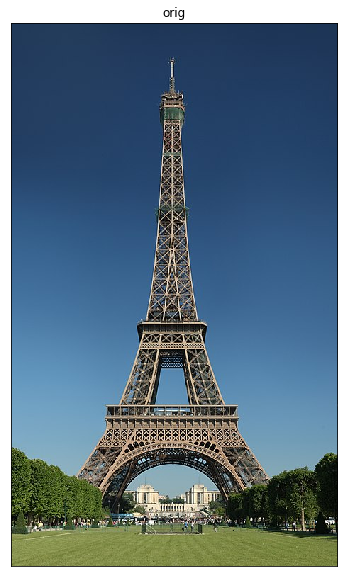

In [4]:

def plot_im(img, title):
    plt.figure(figsize=fig_size)
    plt.imshow(img)
    plt.title(title)
    plt.xticks([])
    plt.yticks([])

img = cv2.imread("Tour_Eiffel.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plot_im(img, "orig")



## mean filter



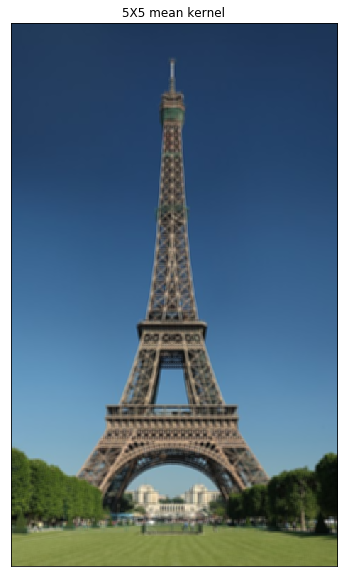

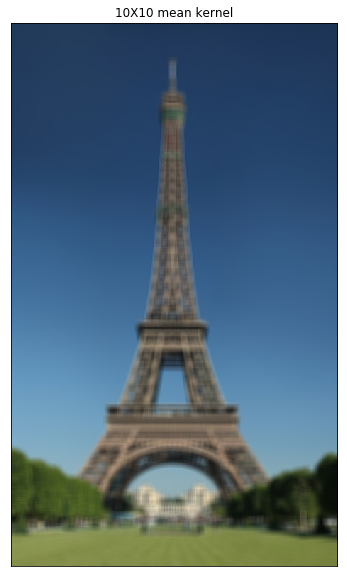

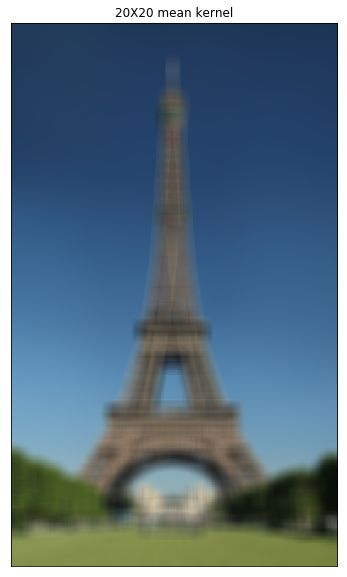

In [5]:


def mean_kernel_smoothing(img, sz):
    kernel = np.ones((sz, sz))/(sz**2)
    dst = cv2.filter2D(img, -1, kernel)

    plot_im(dst, str(sz)+'X'+str(sz)+" mean kernel")


mean_kernel_smoothing(img, 5)
mean_kernel_smoothing(img, 10)
mean_kernel_smoothing(img, 20)



## gaussian filter



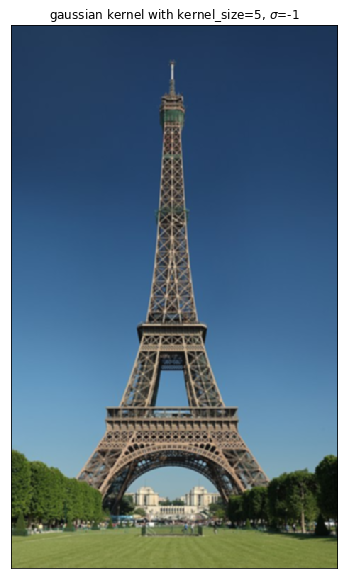

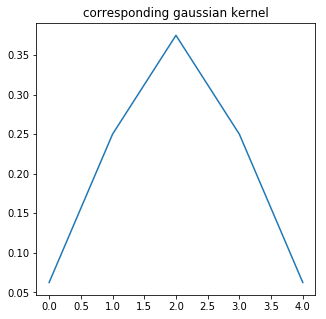

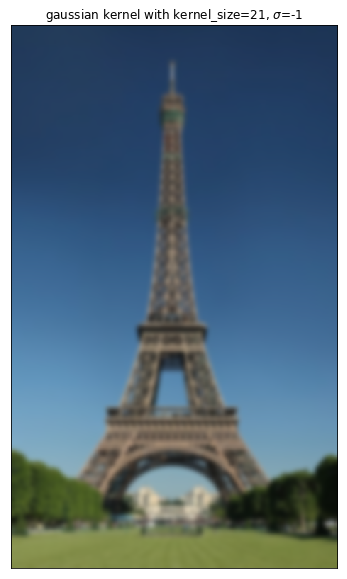

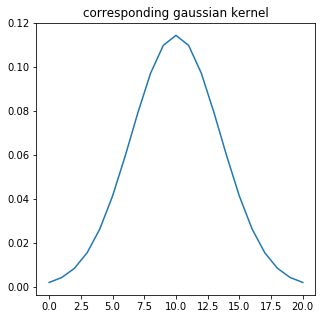

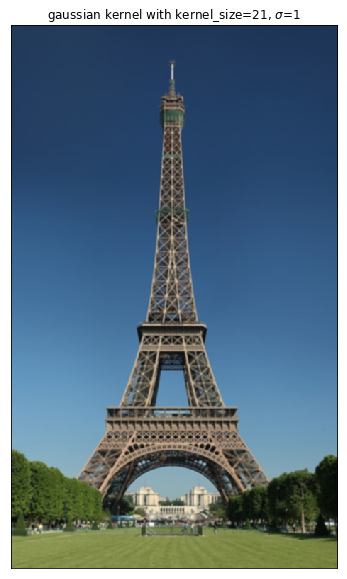

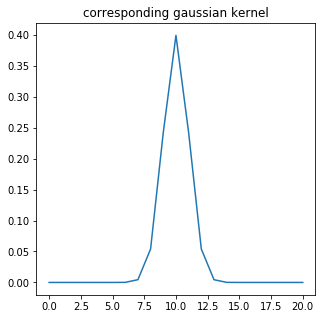

In [6]:


def gauss_blur(img, k_sz, sigma=-1, is_plot_kernel=False):
    blur = cv2.GaussianBlur(img, (k_sz, k_sz), sigma)
    plot_im(blur, "gaussian kernel with kernel_size="
            + str(k_sz)+r", $\sigma$=" + str(sigma))
    if is_plot_kernel:
        gauss_ker = cv2.getGaussianKernel(k_sz, sigma)
        plt.figure(figsize=(fig_size[0]/2, fig_size[1]/2))
        plt.plot(gauss_ker)
        plt.title("corresponding gaussian kernel")


gauss_blur(img, 5, is_plot_kernel=True)
gauss_blur(img, 21, is_plot_kernel=True)
gauss_blur(img, 21, 1, is_plot_kernel=True)



## madian filter



<Figure size 720x720 with 0 Axes>

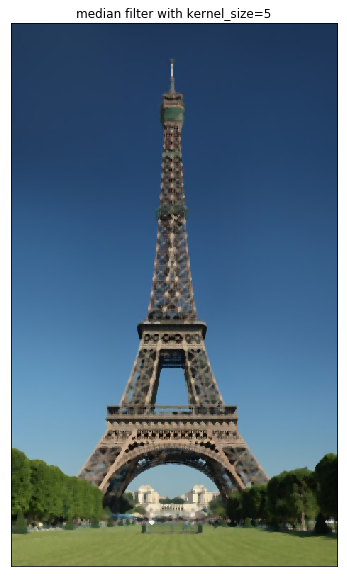

In [7]:


def median_blur(img, k_sz):
    res = cv2.medianBlur(img, k_sz)
    plt.figure(figsize=fig_size)
    plot_im(res, "median filter with kernel_size="+str(k_sz))


median_blur(img, 5)



## noise addition func



In [8]:


def noisy(noise_typ, image, gauss_var=1000, s_p_ratio=0.04):
    # modified from: https://stackoverflow.com/questions/22937589/how-to-add-noise-gaussian-salt-and-pepper-etc-to-image-in-python-with-opencv
    if noise_typ == "gauss":
        mean = 0
        sigma = gauss_var**0.5
        gauss = np.random.normal(mean, sigma, image.shape)

        res = image + gauss
        noisy = np.uint8(res)
        return noisy
    elif noise_typ == "s&p":
        # this implementation is not entirely correct because it assumes that
        # only 0 OR 255 values are S&P noise.
        out = np.copy(image)

        # Salt mode
        mask = np.random.randint(101, size=image.shape) <= s_p_ratio*100/2
        out[mask] = 255

        # Pepper mode
        mask = np.random.randint(101, size=image.shape) <= s_p_ratio*100/2
        out[mask] = 0
        return out




## gaussian noise tests


Text(0.5, 1.0, 'original image + gaussian noise')

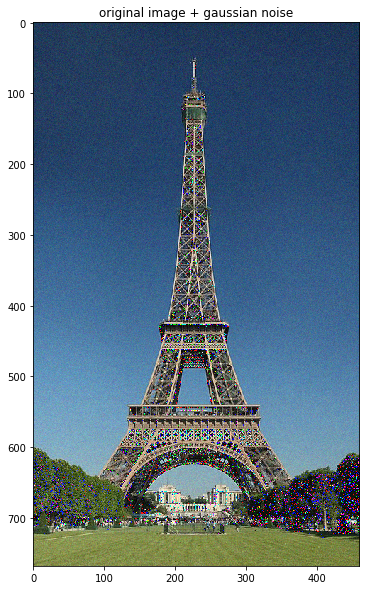

In [9]:
gauss_noise_im = noisy("gauss", img, gauss_var=70)
plt.figure(figsize=fig_size)
plt.imshow(gauss_noise_im)
plt.title('original image + gaussian noise')



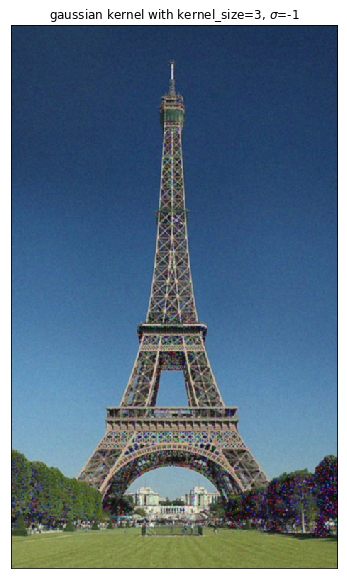

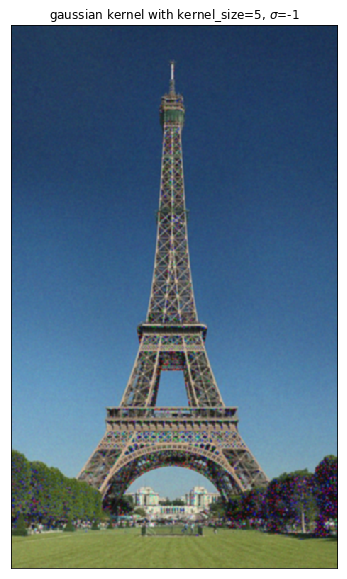

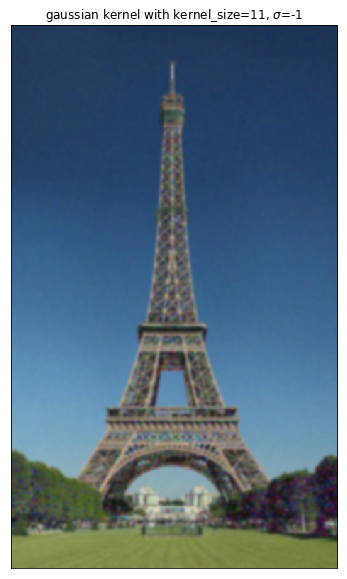

<Figure size 720x720 with 0 Axes>

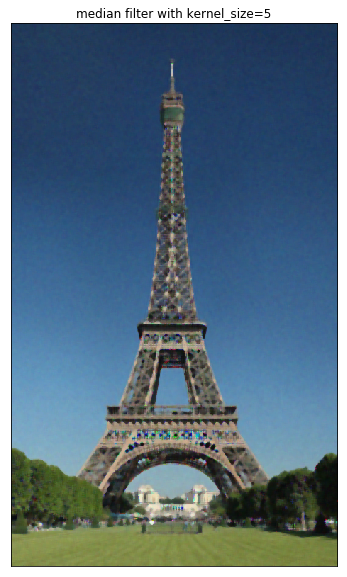

In [10]:
gauss_blur(gauss_noise_im, 3)
gauss_blur(gauss_noise_im, 5)
gauss_blur(gauss_noise_im, 11)
median_blur(gauss_noise_im, 5)



## salt and pepper noise test



Text(0.5, 1.0, 'original image + s&p noise')

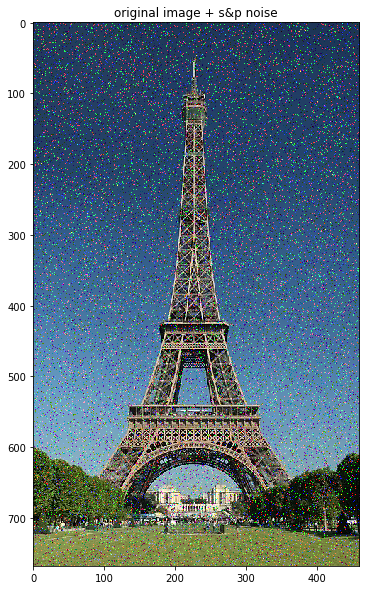

In [11]:
s_p_noise_im = noisy("s&p", img, s_p_ratio=0.04)
plt.figure(figsize=fig_size)
plt.imshow(s_p_noise_im)
plt.title('original image + s&p noise')



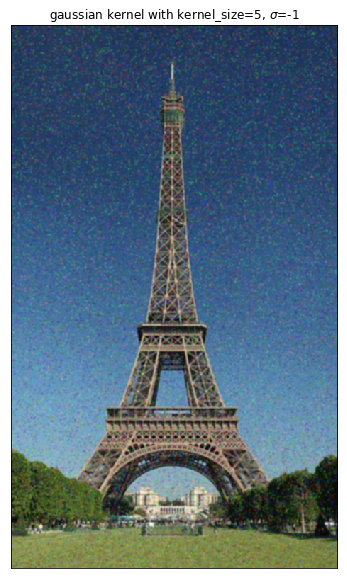

<Figure size 720x720 with 0 Axes>

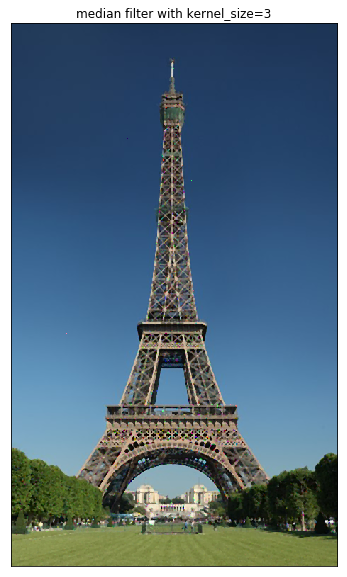

<Figure size 720x720 with 0 Axes>

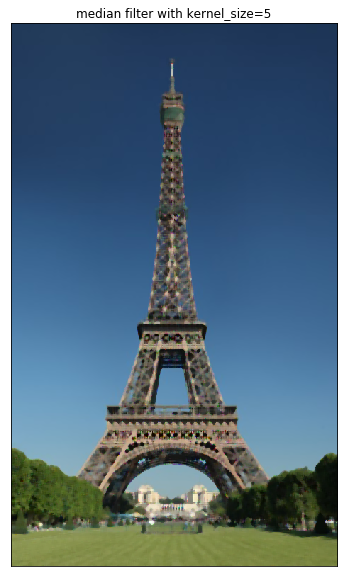

In [12]:
gauss_blur(s_p_noise_im, 5)
median_blur(s_p_noise_im, 3)
median_blur(s_p_noise_im, 5)

